In [4]:
# Run in Colab or local env
# %pip install -q tensorflow matplotlib numpy

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Simple toy corpus (small sentences)
corpus = [
    "i love deep learning",
    "i love artificial intelligence",
    "deep learning is fun",
    "artificial intelligence is cool",
    "i love models",
    "models learn patterns"
]

In [7]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', lower=True, oov_token='<OOV>')


In [8]:
tokenizer

In [9]:
tokenizer.fit_on_texts(corpus)

In [10]:
tokenizer.__dict__

{'word_counts': OrderedDict([('i', 3),
              ('love', 3),
              ('deep', 2),
              ('learning', 2),
              ('artificial', 2),
              ('intelligence', 2),
              ('is', 2),
              ('fun', 1),
              ('cool', 1),
              ('models', 2),
              ('learn', 1),
              ('patterns', 1)]),
 'word_docs': defaultdict(int,
             {'i': 3,
              'love': 3,
              'deep': 2,
              'learning': 2,
              'intelligence': 2,
              'artificial': 2,
              'is': 2,
              'fun': 1,
              'cool': 1,
              'models': 2,
              'learn': 1,
              'patterns': 1}),
 'filters': '',
 'split': ' ',
 'lower': True,
 'num_words': None,
 'document_count': 6,
 'char_level': False,
 'oov_token': '<OOV>',
 'index_docs': defaultdict(int,
             {2: 3,
              3: 3,
              4: 2,
              5: 2,
              7: 2,
              6: 2,
  

In [11]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'love': 3,
 'deep': 4,
 'learning': 5,
 'artificial': 6,
 'intelligence': 7,
 'is': 8,
 'models': 9,
 'fun': 10,
 'cool': 11,
 'learn': 12,
 'patterns': 13}

In [12]:
index_word = {i:w for w,i in word_index.items()}
index_word

{1: '<OOV>',
 2: 'i',
 3: 'love',
 4: 'deep',
 5: 'learning',
 6: 'artificial',
 7: 'intelligence',
 8: 'is',
 9: 'models',
 10: 'fun',
 11: 'cool',
 12: 'learn',
 13: 'patterns'}

In [13]:
vocab_size = len(word_index) + 1 
vocab_size

14

In [14]:
print("Vocab size:", vocab_size)
print("Word index sample:", list(word_index.items()))

Vocab size: 14
Word index sample: [('<OOV>', 1), ('i', 2), ('love', 3), ('deep', 4), ('learning', 5), ('artificial', 6), ('intelligence', 7), ('is', 8), ('models', 9), ('fun', 10), ('cool', 11), ('learn', 12), ('patterns', 13)]


In [15]:
# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(corpus)
print("Sequences:", sequences)

Sequences: [[2, 3, 4, 5], [2, 3, 6, 7], [4, 5, 8, 10], [6, 7, 8, 11], [2, 3, 9], [9, 12, 13]]


In [16]:
# Each word → corresponding numeric ID.
[
  [2, 3, 4, 5],        # "i love deep learning"
  [2, 3, 6, 7],        # "i love artificial intelligence"
  [4, 5, 8, 9],        # "deep learning is fun"
  ...
]

# Now each sentence is a numeric sequence our model can process.


[[2, 3, 4, 5], [2, 3, 6, 7], [4, 5, 8, 9], Ellipsis]

In [17]:
inputs = []
targets = []

In [18]:
sequences

[[2, 3, 4, 5],
 [2, 3, 6, 7],
 [4, 5, 8, 10],
 [6, 7, 8, 11],
 [2, 3, 9],
 [9, 12, 13]]

In [19]:
max_len = max(len(s) for s in sequences)
max_len

4

In [20]:
for s in sequences:
    for i in range(1, len(s)):
        inputs.append(s[:i])       # tokens [0..i-1]
        targets.append(s[i])       # next token


In [21]:
inputs

[[2],
 [2, 3],
 [2, 3, 4],
 [2],
 [2, 3],
 [2, 3, 6],
 [4],
 [4, 5],
 [4, 5, 8],
 [6],
 [6, 7],
 [6, 7, 8],
 [2],
 [2, 3],
 [9],
 [9, 12]]

In [22]:
targets

[3, 4, 5, 3, 6, 7, 5, 8, 10, 7, 8, 11, 3, 9, 12, 13]

In [23]:
# Pad inputs
# inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=max_len, padding='post')
# inputs
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=max_len, padding='pre')
inputs

array([[ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  2,  3,  4],
       [ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  2,  3,  6],
       [ 0,  0,  0,  4],
       [ 0,  0,  4,  5],
       [ 0,  4,  5,  8],
       [ 0,  0,  0,  6],
       [ 0,  0,  6,  7],
       [ 0,  6,  7,  8],
       [ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  0,  0,  9],
       [ 0,  0,  9, 12]], dtype=int32)

In [24]:
targets = np.array(targets)
targets

array([ 3,  4,  5,  3,  6,  7,  5,  8, 10,  7,  8, 11,  3,  9, 12, 13])

In [25]:
for i, t in zip(inputs,targets):
    print(i,t)


[0 0 0 2] 3
[0 0 2 3] 4
[0 2 3 4] 5
[0 0 0 2] 3
[0 0 2 3] 6
[0 2 3 6] 7
[0 0 0 4] 5
[0 0 4 5] 8
[0 4 5 8] 10
[0 0 0 6] 7
[0 0 6 7] 8
[0 6 7 8] 11
[0 0 0 2] 3
[0 0 2 3] 9
[0 0 0 9] 12
[ 0  0  9 12] 13


🟩 1️⃣ The Concept of Embedding

Before diving into code, conceptually:

Words (tokens) like "i", "love", "deep" are categorical — not numeric.

But neural networks need numerical, continuous inputs to compute attention, dot products, and gradients.

So we create an embedding — a learnable table that maps each word ID to a vector of real numbers.

💡 Think of it like a dictionary of meanings, where:
```
"i" → [0.21, 0.05, -0.30, 0.17, ...]
"love" → [0.91, -0.12, 0.44, 0.66, ...]
```
Each vector (e.g., length 16) captures a kind of “semantic fingerprint” for that word.
```
embed_dim = 16  # small, for demonstration
```

📘 What it means:

- Each word will be represented as a vector of 16 numbers (a 16-dimensional space).

- These 16 numbers will be learned during training.

💡 Analogy:

Imagine describing every word using 16 “features” —
like tone, topic, context, part of speech, etc.
More dimensions → richer representations (but more computation).

📊 In practice:

- Small demo → 16 or 32 dimensions

- Real models → 512 (GPT-2 small) to 12288 (GPT-3 large)









In [26]:
vocab_size

14

In [27]:
embed_dim = 16  # small, for demonstration
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)

In [28]:
embedding_layer.__dict__

{'_tracker': <keras.src.utils.tracking.Tracker at 0x1c292877080>,
 '_self_setattr_tracking': True,
 '_trainable_variables': [],
 '_non_trainable_variables': [],
 '_layers': [],
 '_metrics': [],
 '_seed_generators': [],
 '_lock': False,
 '_auto_config': <keras.src.saving.serialization_lib.SerializableDict at 0x1c2927d2330>,
 'build': <function keras.src.layers.core.embedding.Embedding.build(input_shape=None)>,
 'quantize': <function keras.src.layers.core.embedding.Embedding.quantize(mode, type_check=True)>,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_tracked': ['_inbound_nodes',
  '_outbound_nodes',
  '_losses',
  '_loss_ids',
  '_losses_override',
  'call_signature_parameters',
  '_call_context_args',
  '_call_has_context_arg'],
 'name': 'embedding',
 '_inbound_nodes': [],
 '_outbound_nodes': [],
 '_dtype_policy': <DTypePolicy "float32">,
 'activity_regularizer': None,
 '_path': None,
 'built': False,
 'autocast': False,
 '_input_spec': None,
 '_called': False

In [29]:
len(inputs)

16

In [30]:
inputs

array([[ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  2,  3,  4],
       [ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  2,  3,  6],
       [ 0,  0,  0,  4],
       [ 0,  0,  4,  5],
       [ 0,  4,  5,  8],
       [ 0,  0,  0,  6],
       [ 0,  0,  6,  7],
       [ 0,  6,  7,  8],
       [ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  0,  0,  9],
       [ 0,  0,  9, 12]], dtype=int32)

In [31]:
# Test embedding
sample_ids = tf.constant(inputs[:2])
emb = embedding_layer(sample_ids)
print("Embedding shape:", emb.shape)  # (batch, seq_len, embed_dim)

Embedding shape: (2, 4, 16)


In [32]:
emb

<tf.Tensor: shape=(2, 4, 16), dtype=float32, numpy=
array([[[-0.03324956, -0.02731575,  0.03774688,  0.04727579,
         -0.00071138, -0.04717728, -0.04753822,  0.00954398,
         -0.04233533,  0.01436207,  0.02885078,  0.04209692,
          0.03426963,  0.03680594, -0.01687853, -0.02191663],
        [-0.03324956, -0.02731575,  0.03774688,  0.04727579,
         -0.00071138, -0.04717728, -0.04753822,  0.00954398,
         -0.04233533,  0.01436207,  0.02885078,  0.04209692,
          0.03426963,  0.03680594, -0.01687853, -0.02191663],
        [-0.03324956, -0.02731575,  0.03774688,  0.04727579,
         -0.00071138, -0.04717728, -0.04753822,  0.00954398,
         -0.04233533,  0.01436207,  0.02885078,  0.04209692,
          0.03426963,  0.03680594, -0.01687853, -0.02191663],
        [ 0.03982718, -0.00584594,  0.04644915,  0.03843344,
         -0.03223825, -0.00929825, -0.00090814, -0.00695952,
         -0.02411369, -0.04916078,  0.01575817, -0.01485217,
          0.04960096, -0.03945

In [33]:
inputs

array([[ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  2,  3,  4],
       [ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  2,  3,  6],
       [ 0,  0,  0,  4],
       [ 0,  0,  4,  5],
       [ 0,  4,  5,  8],
       [ 0,  0,  0,  6],
       [ 0,  0,  6,  7],
       [ 0,  6,  7,  8],
       [ 0,  0,  0,  2],
       [ 0,  0,  2,  3],
       [ 0,  0,  0,  9],
       [ 0,  0,  9, 12]], dtype=int32)

In [34]:
# Test embedding
sample_ids2 = tf.constant([inputs[0]])
emb2 = embedding_layer(sample_ids2)
emb2

<tf.Tensor: shape=(1, 4, 16), dtype=float32, numpy=
array([[[-0.03324956, -0.02731575,  0.03774688,  0.04727579,
         -0.00071138, -0.04717728, -0.04753822,  0.00954398,
         -0.04233533,  0.01436207,  0.02885078,  0.04209692,
          0.03426963,  0.03680594, -0.01687853, -0.02191663],
        [-0.03324956, -0.02731575,  0.03774688,  0.04727579,
         -0.00071138, -0.04717728, -0.04753822,  0.00954398,
         -0.04233533,  0.01436207,  0.02885078,  0.04209692,
          0.03426963,  0.03680594, -0.01687853, -0.02191663],
        [-0.03324956, -0.02731575,  0.03774688,  0.04727579,
         -0.00071138, -0.04717728, -0.04753822,  0.00954398,
         -0.04233533,  0.01436207,  0.02885078,  0.04209692,
          0.03426963,  0.03680594, -0.01687853, -0.02191663],
        [ 0.03982718, -0.00584594,  0.04644915,  0.03843344,
         -0.03223825, -0.00929825, -0.00090814, -0.00695952,
         -0.02411369, -0.04916078,  0.01575817, -0.01485217,
          0.04960096, -0.03945

In [35]:
emb[0]

<tf.Tensor: shape=(4, 16), dtype=float32, numpy=
array([[-0.03324956, -0.02731575,  0.03774688,  0.04727579, -0.00071138,
        -0.04717728, -0.04753822,  0.00954398, -0.04233533,  0.01436207,
         0.02885078,  0.04209692,  0.03426963,  0.03680594, -0.01687853,
        -0.02191663],
       [-0.03324956, -0.02731575,  0.03774688,  0.04727579, -0.00071138,
        -0.04717728, -0.04753822,  0.00954398, -0.04233533,  0.01436207,
         0.02885078,  0.04209692,  0.03426963,  0.03680594, -0.01687853,
        -0.02191663],
       [-0.03324956, -0.02731575,  0.03774688,  0.04727579, -0.00071138,
        -0.04717728, -0.04753822,  0.00954398, -0.04233533,  0.01436207,
         0.02885078,  0.04209692,  0.03426963,  0.03680594, -0.01687853,
        -0.02191663],
       [ 0.03982718, -0.00584594,  0.04644915,  0.03843344, -0.03223825,
        -0.00929825, -0.00090814, -0.00695952, -0.02411369, -0.04916078,
         0.01575817, -0.01485217,  0.04960096, -0.03945911,  0.00775521,
         

In [36]:
# Print the exact mapping your tokenizer created
print("word_index:", tokenizer.word_index)         # word -> id
print("index_word:", {i:w for w,i in tokenizer.word_index.items()})  # id -> word

# Example: to inspect id of 'love'
print("id('love') =", tokenizer.word_index.get('love'))


word_index: {'<OOV>': 1, 'i': 2, 'love': 3, 'deep': 4, 'learning': 5, 'artificial': 6, 'intelligence': 7, 'is': 8, 'models': 9, 'fun': 10, 'cool': 11, 'learn': 12, 'patterns': 13}
index_word: {1: '<OOV>', 2: 'i', 3: 'love', 4: 'deep', 5: 'learning', 6: 'artificial', 7: 'intelligence', 8: 'is', 9: 'models', 10: 'fun', 11: 'cool', 12: 'learn', 13: 'patterns'}
id('love') = 3


In [37]:
embed_dim = 16
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
embedding_layer.__dict__

{'_tracker': <keras.src.utils.tracking.Tracker at 0x1c2928ad2b0>,
 '_self_setattr_tracking': True,
 '_trainable_variables': [],
 '_non_trainable_variables': [],
 '_layers': [],
 '_metrics': [],
 '_seed_generators': [],
 '_lock': False,
 '_auto_config': <keras.src.saving.serialization_lib.SerializableDict at 0x1c2928acce0>,
 'build': <function keras.src.layers.core.embedding.Embedding.build(input_shape=None)>,
 'quantize': <function keras.src.layers.core.embedding.Embedding.quantize(mode, type_check=True)>,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_tracked': ['_inbound_nodes',
  '_outbound_nodes',
  '_losses',
  '_loss_ids',
  '_losses_override',
  'call_signature_parameters',
  '_call_context_args',
  '_call_has_context_arg'],
 'name': 'embedding_1',
 '_inbound_nodes': [],
 '_outbound_nodes': [],
 '_dtype_policy': <DTypePolicy "float32">,
 'activity_regularizer': None,
 '_path': None,
 'built': False,
 'autocast': False,
 '_input_spec': None,
 '_called': Fal

In [38]:
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]    # (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates  # (seq_len, d_model)

    # apply sin to even indices and cos to odd indices
    sines = np.sin(angle_rads[:, 0::2])
    coses = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.zeros(angle_rads.shape)
    pos_encoding[:, 0::2] = sines
    pos_encoding[:, 1::2] = coses
    return tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)  # shape (1, seq_len, d_model)

# Example:
pos_enc = positional_encoding(max_len, embed_dim)
print("Pos encoding shape:", pos_enc.shape)


Pos encoding shape: (1, 4, 16)


In [39]:
seq_len = max_len

d_model= embed_dim

In [40]:
np.arange(seq_len).shape

(4,)

In [41]:
pos = np.arange(seq_len)[:, np.newaxis]
pos

array([[0],
       [1],
       [2],
       [3]])

In [42]:
pos.shape

(4, 1)

In [43]:
pos.ndim

2

In [44]:
np.arange(d_model)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [45]:
np.arange(d_model).shape

(16,)

In [46]:
np.arange(d_model).ndim

1

In [47]:
np.arange(d_model)[np.newaxis, :] 

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])

In [48]:
np.arange(d_model)[np.newaxis, :].shape

(1, 16)

In [49]:
np.arange(d_model)[np.newaxis, :].ndim

2

In [50]:
3/2

1.5

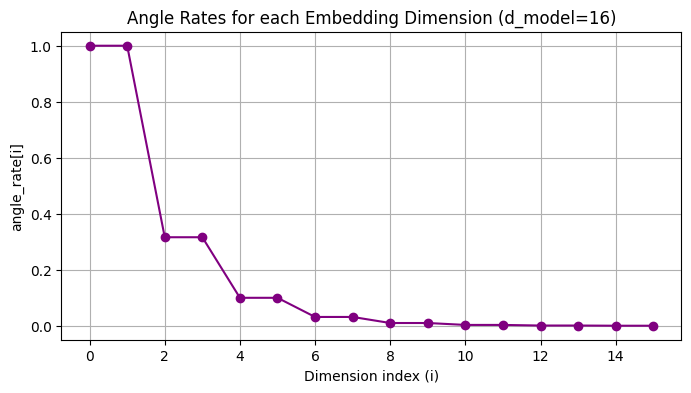

In [51]:
import numpy as np
import matplotlib.pyplot as plt

d_model = 16
i = np.arange(d_model)
angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))

plt.figure(figsize=(8, 4))
plt.plot(i, angle_rates, 'o-', color='purple')
plt.title("Angle Rates for each Embedding Dimension (d_model=16)")
plt.xlabel("Dimension index (i)")
plt.ylabel("angle_rate[i]")
plt.grid(True)
plt.show()


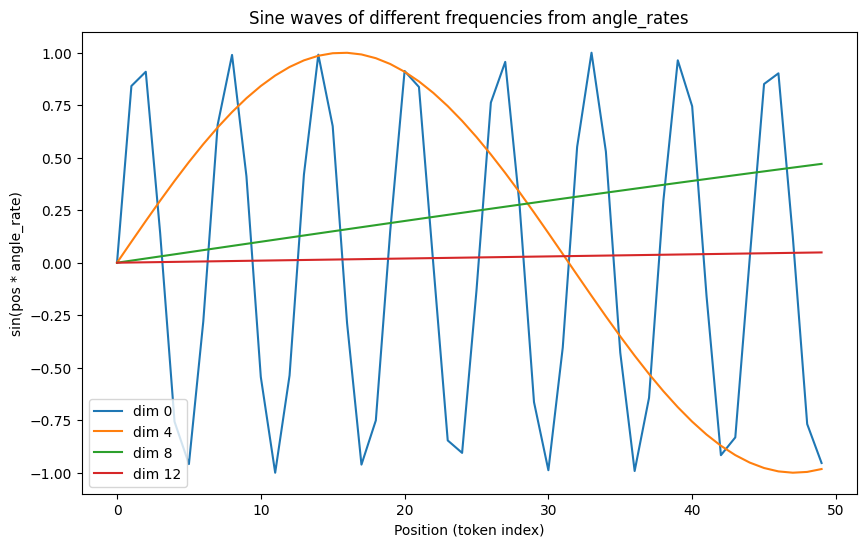

In [52]:
positions = np.arange(50)  # 50 tokens
plt.figure(figsize=(10,6))

for k in range(0, d_model, 4):  # pick every 4th dimension
    angle_rate = angle_rates[k]
    angle = positions * angle_rate
    plt.plot(positions, np.sin(angle), label=f"dim {k}")

plt.title("Sine waves of different frequencies from angle_rates")
plt.xlabel("Position (token index)")
plt.ylabel("sin(pos * angle_rate)")
plt.legend()
plt.show()

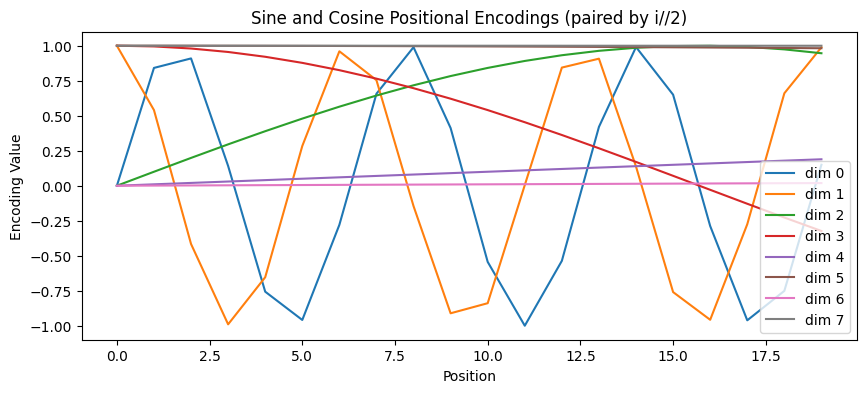

In [53]:
import numpy as np
import matplotlib.pyplot as plt

d_model = 8
i = np.arange(d_model)
angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
pos = np.arange(20).reshape(20, 1)
angle_rads = pos * angle_rates
plt.figure(figsize=(10,4))
for dim in range(d_model):
    plt.plot(pos, np.sin(angle_rads[:, dim]) if dim % 2 == 0 else np.cos(angle_rads[:, dim]), label=f"dim {dim}")
plt.title("Sine and Cosine Positional Encodings (paired by i//2)")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.legend()
plt.show()


In [54]:
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]    # (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates  # (seq_len, d_model)

    # apply sin to even indices and cos to odd indices
    sines = np.sin(angle_rads[:, 0::2])
    coses = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.zeros(angle_rads.shape)
    pos_encoding[:, 0::2] = sines
    pos_encoding[:, 1::2] = coses
    return tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)  # shape (1, seq_len, d_model)

# Example:
pos_enc = positional_encoding(max_len, embed_dim)
print("Pos encoding shape:", pos_enc.shape)


Pos encoding shape: (1, 4, 16)


In [55]:
seq_len = max_len

d_model= embed_dim

In [56]:
seq_len

4

In [57]:
embed_dim

16

In [58]:
pos = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
i = np.arange(d_model)[np.newaxis, :]    # (1, d_model)
angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
angle_rads = pos * angle_rates  # (seq_len, d_model)

In [59]:
# apply sin to even indices and cos to odd indices
sines = np.sin(angle_rads[:, 0::2])
coses = np.cos(angle_rads[:, 1::2])
pos_encoding = np.zeros(angle_rads.shape)
pos_encoding[:, 0::2] = sines
pos_encoding[:, 1::2] = coses

In [60]:
angle_rads.shape

(4, 16)

In [61]:
angle_rads.shape

(4, 16)

In [62]:
pos_encoding = np.zeros(angle_rads.shape)
pos_encoding[:, 0::2] = sines
pos_encoding[:, 1::2] = coses

In [63]:
tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)

<tf.Tensor: shape=(1, 4, 16), dtype=float32, numpy=
array([[[ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00],
        [ 8.4147096e-01,  5.4030228e-01,  3.1098360e-01,  9.5041525e-01,
          9.9833414e-02,  9.9500418e-01,  3.1617507e-02,  9.9950004e-01,
          9.9998331e-03,  9.9994999e-01,  3.1622723e-03,  9.9999499e-01,
          9.9999981e-04,  9.9999952e-01,  3.1622776e-04,  9.9999994e-01],
        [ 9.0929741e-01, -4.1614684e-01,  5.9112710e-01,  8.0657840e-01,
          1.9866933e-01,  9.8006660e-01,  6.3203394e-02,  9.9800068e-01,
          1.9998666e-02,  9.9980003e-01,  6.3245133e-03,  9.9997997e-01,
          1.9999987e-03,  9.9999797e-01,  6.3245551e-04,  9.9999982e-01],
        [ 1.4112000e-01, -9.8999250e-01,  8.1264889e-01,  5.8275360e-

In [64]:
pos_enc = tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)
pos_enc.shape

TensorShape([1, 4, 16])

In [65]:
def scaled_dot_product_attention(Q, K, V, mask=None):
    # Q, K, V shapes: (batch, heads, seq_len, depth)
    matmul_qk = tf.matmul(Q, K, transpose_b=True)  # (..., seq_len_q, seq_len_k)
    dk = tf.cast(tf.shape(K)[-1], tf.float32)
    scaled_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
    output = tf.matmul(attention_weights, V)  # (..., seq_len_q, depth_v)
    return output, attention_weights


🌈 Intuitive Analogy

Think of attention like a spotlight:

- Q → where the model is currently looking.

- K → potential places to look.

- V → the actual information there.

The dot product measures “how relevant” each place is.
The softmax normalizes these into focus weights.
Then the model takes a weighted average of all information (V) — that’s the output.

In [66]:
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.depth = d_model // num_heads
        self.d_model = d_model

        self.Wq = tf.keras.layers.Dense(d_model)
        self.Wk = tf.keras.layers.Dense(d_model)
        self.Wv = tf.keras.layers.Dense(d_model)
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x):
        # x shape: (batch, seq_len, d_model) -> (batch, num_heads, seq_len, depth)
        x = tf.reshape(x, (tf.shape(x)[0], tf.shape(x)[1], self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, x, mask=None):
        Q = self.Wq(x)  # (batch, seq, d_model)
        K = self.Wk(x)
        V = self.Wv(x)

        Q = self.split_heads(Q)
        K = self.split_heads(K)
        V = self.split_heads(V)

        attn_output, attn_weights = scaled_dot_product_attention(Q, K, V, mask)
        # attn_output: (batch, num_heads, seq_len, depth)
        attn_output = tf.transpose(attn_output, perm=[0, 2, 1, 3])  # (batch, seq_len, num_heads, depth)
        concat = tf.reshape(attn_output, (tf.shape(attn_output)[0], tf.shape(attn_output)[1], self.d_model))  # (batch, seq_len, d_model)
        output = self.dense(concat)
        return output, attn_weights  # attn_weights: (batch, num_heads, seq_len, seq_len)


In [67]:
import tensorflow as tf

# Example: 1 sentence (batch=1), 5 words, each embedding has 4 features
x = tf.constant([[
    [1.0, 0.0, 0.0, 0.0],     # "I"
    [0.8, 0.5, 0.0, 0.0],     # "love"
    [0.2, 1.0, 0.3, 0.2],     # "studying"
    [0.0, 0.4, 1.0, 0.8],     # "artificial"
    [0.1, 0.3, 0.9, 1.0],     # "intelligence"
]])

d_model = 4
Wq = tf.keras.layers.Dense(d_model)
Wk = tf.keras.layers.Dense(d_model)
Wv = tf.keras.layers.Dense(d_model)

Q = Wq(x)
K = Wk(x)
V = Wv(x)

print("Q shape:", Q.shape)
print("K shape:", K.shape)
print("V shape:", V.shape)
print("Example Q values:\n", Q[0, 0])  # For word "I"


Q shape: (1, 5, 4)
K shape: (1, 5, 4)
V shape: (1, 5, 4)
Example Q values:
 tf.Tensor([ 0.5248553  -0.18651438  0.31815273  0.11466426], shape=(4,), dtype=float32)


In [68]:
Wq = tf.keras.layers.Dense(d_model)
Wq.__dict__

{'_tracker': <keras.src.utils.tracking.Tracker at 0x1c292bfa660>,
 '_self_setattr_tracking': True,
 '_trainable_variables': [],
 '_non_trainable_variables': [],
 '_layers': [],
 '_metrics': [],
 '_seed_generators': [],
 '_lock': False,
 '_auto_config': <keras.src.saving.serialization_lib.SerializableDict at 0x1c292bfb9b0>,
 'build': <function keras.src.layers.core.dense.Dense.build(input_shape)>,
 'quantize': <function keras.src.layers.core.dense.Dense.quantize(mode, type_check=True)>,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_tracked': ['_inbound_nodes',
  '_outbound_nodes',
  '_losses',
  '_loss_ids',
  '_losses_override',
  'call_signature_parameters',
  '_call_context_args',
  '_call_has_context_arg'],
 'name': 'dense_3',
 '_inbound_nodes': [],
 '_outbound_nodes': [],
 '_dtype_policy': <DTypePolicy "float32">,
 'activity_regularizer': None,
 '_path': None,
 'built': False,
 'autocast': True,
 '_input_spec': InputSpec(min_ndim=2),
 '_called': False,
 'sup

In [69]:
# Wq = tf.keras.layers.Dense(d_model)
# Wk = tf.keras.layers.Dense(d_model)
# Wv = tf.keras.layers.Dense(d_model)

In [70]:
Q

<tf.Tensor: shape=(1, 5, 4), dtype=float32, numpy=
array([[[ 0.5248553 , -0.18651438,  0.31815273,  0.11466426],
        [ 0.7186774 , -0.07959838, -0.0891926 ,  0.19853354],
        [ 0.9336297 , -0.10908863, -0.56586254,  0.18957236],
        [ 1.0804019 , -0.7588063 , -0.17363852, -0.02477604],
        [ 1.1383564 , -0.9432898 , -0.27596885,  0.07364771]]],
      dtype=float32)>

In [71]:
test_sentence = "I love deep"

In [115]:
test_seq = tokenizer.texts_to_sequences([test_sentence])[0]
print("Token IDs:", test_seq)

Token IDs: [2, 3, 4]


In [116]:
# Pad to same max length
test_input = tf.keras.preprocessing.sequence.pad_sequences([test_seq], maxlen=inputs.shape[1], padding='pre')
test_input = test_input.astype('int32')
print("Padded Input:", test_input)

Padded Input: [[0 2 3 4]]


In [83]:
import numpy as np
import tensorflow as tf
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]    # (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates  # (seq_len, d_model)

    # apply sin to even indices and cos to odd indices
    sines = np.sin(angle_rads[:, 0::2])
    coses = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.zeros(angle_rads.shape)
    pos_encoding[:, 0::2] = sines
    pos_encoding[:, 1::2] = coses
    return tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)

# Example:
pos_enc = positional_encoding(4, 16)
print("Pos encoding shape:", pos_enc.shape)

Pos encoding shape: (1, 4, 16)


In [84]:
seq_len, d_model = 4,16

In [87]:
pos = np.arange(seq_len)[:, np.newaxis] 
pos

array([[0],
       [1],
       [2],
       [3]])

In [91]:
i = np.arange(d_model)[np.newaxis, :]
i

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])

In [92]:
angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
angle_rates

array([[1.00000000e+00, 1.00000000e+00, 3.16227766e-01, 3.16227766e-01,
        1.00000000e-01, 1.00000000e-01, 3.16227766e-02, 3.16227766e-02,
        1.00000000e-02, 1.00000000e-02, 3.16227766e-03, 3.16227766e-03,
        1.00000000e-03, 1.00000000e-03, 3.16227766e-04, 3.16227766e-04]])

In [95]:
angle_rates.shape

(1, 16)

In [96]:
pos

array([[0],
       [1],
       [2],
       [3]])

In [100]:
angle_rates.shape

(1, 16)

In [99]:
angle_rads = pos * angle_rates
angle_rads

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 3.16227766e-01, 3.16227766e-01,
        1.00000000e-01, 1.00000000e-01, 3.16227766e-02, 3.16227766e-02,
        1.00000000e-02, 1.00000000e-02, 3.16227766e-03, 3.16227766e-03,
        1.00000000e-03, 1.00000000e-03, 3.16227766e-04, 3.16227766e-04],
       [2.00000000e+00, 2.00000000e+00, 6.32455532e-01, 6.32455532e-01,
        2.00000000e-01, 2.00000000e-01, 6.32455532e-02, 6.32455532e-02,
        2.00000000e-02, 2.00000000e-02, 6.32455532e-03, 6.32455532e-03,
        2.00000000e-03, 2.00000000e-03, 6.32455532e-04, 6.32455532e-04],
       [3.00000000e+00, 3.00000000e+00, 9.48683298e-01, 9.48683298e-01,
        3.00000000e-01, 3.00000000e-01, 9.48683298e-02, 9.486

In [101]:
angle_rads.shape

(4, 16)

In [109]:
angle_rads[:, 0::2]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.16227766e-01, 1.00000000e-01, 3.16227766e-02,
        1.00000000e-02, 3.16227766e-03, 1.00000000e-03, 3.16227766e-04],
       [2.00000000e+00, 6.32455532e-01, 2.00000000e-01, 6.32455532e-02,
        2.00000000e-02, 6.32455532e-03, 2.00000000e-03, 6.32455532e-04],
       [3.00000000e+00, 9.48683298e-01, 3.00000000e-01, 9.48683298e-02,
        3.00000000e-02, 9.48683298e-03, 3.00000000e-03, 9.48683298e-04]])

In [107]:
# apply sin to even indices and cos to odd indices
sines = np.sin(angle_rads[:, 0::2])
sines

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.41470985e-01, 3.10983593e-01, 9.98334166e-02, 3.16175064e-02,
        9.99983333e-03, 3.16227239e-03, 9.99999833e-04, 3.16227761e-04],
       [9.09297427e-01, 5.91127117e-01, 1.98669331e-01, 6.32033979e-02,
        1.99986667e-02, 6.32451316e-03, 1.99999867e-03, 6.32455490e-04],
       [1.41120008e-01, 8.12648897e-01, 2.95520207e-01, 9.47260913e-02,
        2.99955002e-02, 9.48669068e-03, 2.99999550e-03, 9.48683156e-04]])

In [108]:
coses = np.cos(angle_rads[:, 1::2])
coses

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 0.54030231,  0.95041528,  0.99500417,  0.99950004,  0.99995   ,
         0.999995  ,  0.9999995 ,  0.99999995],
       [-0.41614684,  0.80657841,  0.98006658,  0.99800067,  0.99980001,
         0.99998   ,  0.999998  ,  0.9999998 ],
       [-0.9899925 ,  0.58275361,  0.95533649,  0.99550337,  0.99955003,
         0.999955  ,  0.9999955 ,  0.99999955]])

In [110]:
pos_encoding = np.zeros(angle_rads.shape)
pos_encoding

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [111]:
pos_encoding.shape

(4, 16)

In [112]:
pos_encoding[:, 0::2] = sines
pos_encoding[:, 1::2] = coses

In [113]:
pos_encoding

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 8.41470985e-01,  5.40302306e-01,  3.10983593e-01,
         9.50415280e-01,  9.98334166e-02,  9.95004165e-01,
         3.16175064e-02,  9.99500042e-01,  9.99983333e-03,
         9.99950000e-01,  3.16227239e-03,  9.99995000e-01,
         9.99999833e-04,  9.99999500e-01,  3.16227761e-04,
         9.99999950e-01],
       [ 9.09297427e-01, -4.16146837e-01,  5.91127117e-01,
         8.06578410e-01,  1.98669331e-01,  9.80066578e-01,
         6.32033979e-02,  9.98000667e-01,  1.99986667e-02,
         9.99800007e-01,  6.32451316e-03,  9.99980000e-01,
         1.99999867e-03,  9.99998000e-01,  6.32455490e-04,
         9.99999800e-01],
       [ 1.41120008e-01, -9.89992497e

In [114]:
pos_encoding.shape

(4, 16)

In [117]:
tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)

<tf.Tensor: shape=(1, 4, 16), dtype=float32, numpy=
array([[[ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  1.0000000e+00],
        [ 8.4147096e-01,  5.4030228e-01,  3.1098360e-01,  9.5041525e-01,
          9.9833414e-02,  9.9500418e-01,  3.1617507e-02,  9.9950004e-01,
          9.9998331e-03,  9.9994999e-01,  3.1622723e-03,  9.9999499e-01,
          9.9999981e-04,  9.9999952e-01,  3.1622776e-04,  9.9999994e-01],
        [ 9.0929741e-01, -4.1614684e-01,  5.9112710e-01,  8.0657840e-01,
          1.9866933e-01,  9.8006660e-01,  6.3203394e-02,  9.9800068e-01,
          1.9998666e-02,  9.9980003e-01,  6.3245133e-03,  9.9997997e-01,
          1.9999987e-03,  9.9999797e-01,  6.3245551e-04,  9.9999982e-01],
        [ 1.4112000e-01, -9.8999250e-01,  8.1264889e-01,  5.8275360e-